In [3]:
import sys
sys.path.insert(1, 'src')

from src.coins import *
from src.generator import generate_random_model
from src.reverse_engineer import reverse_engineer_model
from src.error import calculate_model_error

In [6]:
NUM_COINS = 1000
NUM_FLIPS = 1e4
SIZE_RANGE = (1, 5)
MEMORY_DEPTH_RANGE = (1, 4)

models = []
memory_depth_data = []
complexity_data = {}
error_data = {}

DEBUG = True

for i in range(NUM_COINS):
    input_model = generate_random_model(size_range=SIZE_RANGE, memory_depth_range=MEMORY_DEPTH_RANGE, benchmark=True, benchmark_flips=int(NUM_FLIPS))
    calix_output = reverse_engineer_model(input_model.benchmark_result.flip_history, input_model, benchmark=True, benchmark_flips=int(NUM_FLIPS))

    calix_error = calculate_model_error(input_model, calix_output)
    # sleeper_error = calculate_model_error(input_model, sleeper_output, sleeper=True)

    if DEBUG:
        print(f'Iteration {i+1}: n={input_model.size}, m={input_model.memory_depth}, error={np.round(calix_error, 1)}')

    if not (input_model.memory_depth in complexity_data):
        complexity_data[input_model.memory_depth] = []
        error_data[input_model.memory_depth] = []

    models.append(input_model)
    memory_depth_data.append(input_model.memory_depth)
    complexity_data[input_model.memory_depth].append(input_model.complexity)
    error_data[input_model.memory_depth].append(calix_error)

memory_depth_data = set(memory_depth_data)
min_memory_depth = min(memory_depth_data)
max_memory_depth = max(memory_depth_data)


Iteration 1: n=3, m=2, error=6.1
Iteration 2: n=1, m=3, error=0.0
Iteration 3: n=2, m=1, error=2.8
Iteration 4: n=2, m=1, error=0.2
Iteration 5: n=2, m=3, error=1.0
Iteration 6: n=4, m=1, error=6.5
Iteration 7: n=4, m=3, error=17.1
Iteration 8: n=4, m=4, error=26.1
Iteration 9: n=2, m=4, error=4.7
Iteration 10: n=2, m=3, error=8.3
Iteration 11: n=2, m=2, error=0.6
Iteration 12: n=5, m=3, error=40.0
Iteration 13: n=1, m=1, error=0.0
Iteration 14: n=1, m=3, error=0.0
Iteration 15: n=2, m=1, error=1.8
Iteration 16: n=3, m=4, error=10.4
Iteration 17: n=1, m=4, error=0.0
Iteration 18: n=5, m=2, error=23.1
Iteration 19: n=4, m=1, error=16.5
Iteration 20: n=1, m=3, error=0.0
Iteration 21: n=5, m=4, error=27.8
Iteration 22: n=3, m=3, error=3.1
Iteration 23: n=1, m=1, error=0.0
Iteration 24: n=5, m=1, error=19.4
Iteration 25: n=2, m=1, error=2.0
Iteration 26: n=3, m=3, error=5.6
Iteration 27: n=4, m=4, error=22.9
Iteration 28: n=5, m=3, error=55.6
Iteration 29: n=1, m=2, error=0.0
Iteration 30:

TypeError: cannot unpack non-iterable NoneType object

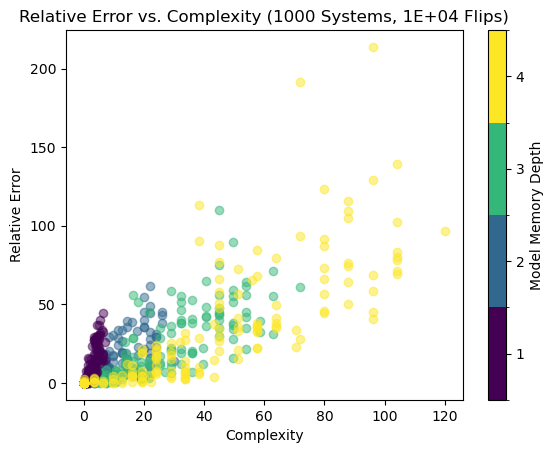

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

plt.figure()
ax = plt.gca()  # Get the current axis

plt.xlabel('Complexity')
plt.ylabel('Relative Error')
plt.title(f'Relative Error vs. Complexity ({NUM_COINS} Systems, {NUM_FLIPS:.0E} Flips)')

# Define colormap
cmap = plt.cm.viridis
min_memory_depth = MEMORY_DEPTH_RANGE[0]
max_memory_depth = MEMORY_DEPTH_RANGE[1]
norm = mcolors.BoundaryNorm(boundaries=np.arange(min_memory_depth - 0.5, max_memory_depth + 1.5), 
                            ncolors=cmap.N)

# Plot with color-coded memory depth
for i in complexity_data.keys():
    ax.scatter(complexity_data[i], error_data[i], color=cmap(norm(i)), alpha=0.5)

# Create ScalarMappable for colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Fixes the error

# Add colorbar to the current axis
plt.colorbar(sm, ax=ax, 
             ticks=range(min_memory_depth, max_memory_depth+1), 
             label="Model Memory Depth")

plt.show()

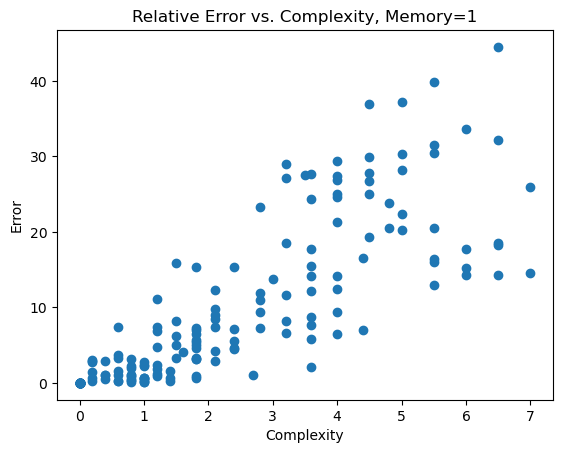

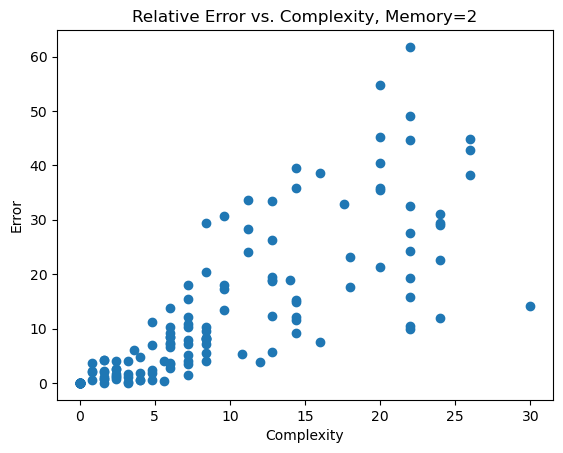

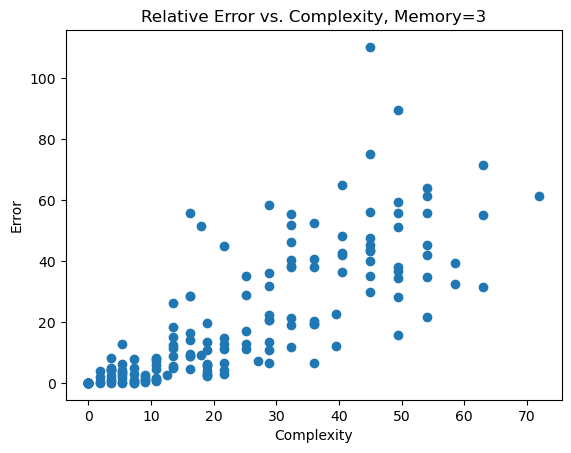

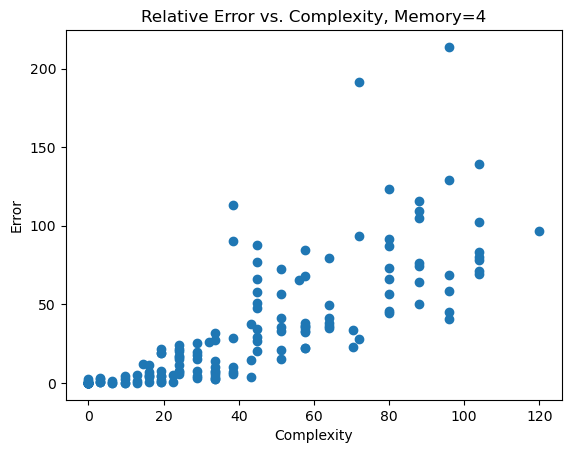

In [12]:
for memory in range(MEMORY_DEPTH_RANGE[0], MEMORY_DEPTH_RANGE[1]+1):
    plt.figure()
    plt.xlabel('Complexity')
    plt.ylabel('Error')
    plt.title(f'Relative Error vs. Complexity, Memory={memory}')
    plt.scatter(complexity_data[memory], error_data[memory])
    plt.show()